In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
Merge_data = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
Merge_data


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

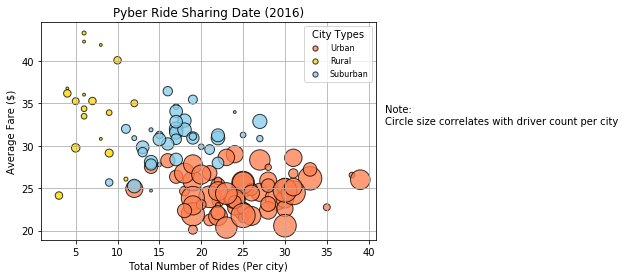

In [11]:
# # Obtain the x and y coordinates for each of the three city types
            
Urban = Merge_data.loc[Merge_data["type"] == "Urban", :].groupby("city")["fare"].describe()
Rural = Merge_data.loc[Merge_data["type"] == "Rural", :].groupby("city")["fare"].describe()
Suburban = Merge_data.loc[Merge_data["type"] == "Suburban", :].groupby("city")["fare"].describe()

# # Build the scatter plots for each city types
plt.scatter(Urban['count'], Urban['mean'], marker="o", facecolors="coral", edgecolors="black", 
s=8* Merge_data.loc[Merge_data["type"] == "Urban", :].groupby("city")["driver_count"].mean(), alpha=.77, label="Urban")
plt.scatter(Rural['count'], Rural['mean'], marker="o", facecolors="gold", edgecolors="black", 
s=8* Merge_data.loc[Merge_data["type"] == "Rural", :].groupby("city")["driver_count"].mean(), alpha=.77, label="Rural")
plt.scatter(Suburban['count'], Suburban['mean'], marker="o", facecolors="SkyBlue", edgecolors="black",
s=8* Merge_data.loc[Merge_data["type"] == "Suburban", :].groupby("city")["driver_count"].mean(), alpha=.77, label="Suburban")
# # Incorporate the other graph properties

# Incorporate a text label regarding circle sizew
plt.title("Pyber Ride Sharing Date (2016)")
plt.xlabel("Total Number of Rides (Per city)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
lgnd = plt.legend(loc=1, title="City Types", fontsize=8)

lgnd.legendHandles[0]._sizes = [27]
lgnd.legendHandles[1]._sizes = [27]
lgnd.legendHandles[2]._sizes = [27]
plt.text(42,34,"Note:")
plt.text(42, 32.5, "Circle size correlates with driver count per city")
plt.savefig('Scatter_Plot_Pyber.png')


# Save Figure


## Total Fares by City Type

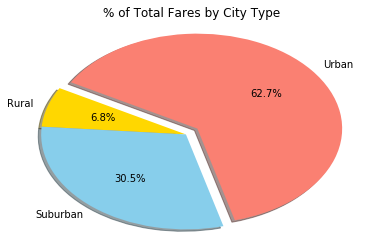

In [8]:
# Calculate Type Percents
Totalfare = Merge_data['fare'].sum()
percent_type = [Merge_data.loc[Merge_data["type"] == "Urban", :]["fare"].sum()/Totalfare,
        Merge_data.loc[Merge_data["type"] == "Rural", :]["fare"].sum()/Totalfare,
        Merge_data.loc[Merge_data["type"] == "Suburban", :]["fare"].sum()/Totalfare]

colors = ["salmon", "gold", "SkyBlue"]
labels = ["Urban", "Rural", "Suburban"]

explode = (0.1, 0, 0)
# Build Pie Chart
plt.pie(percent_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-75) 
plt.title("% of Total Fares by City Type")
plt.axis("tight")
# Save Figure
plt.savefig('Pie_Chart_Pyber1.png')


## Total Rides by City Type

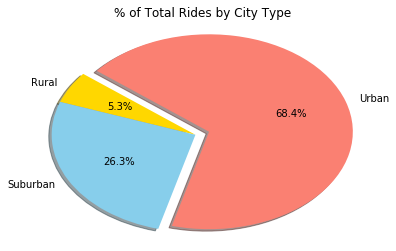

In [9]:
# Calculate Ride Percents
TotalRides=Merge_data["fare"].count()
percent_rides = [Merge_data.loc[Merge_data["type"] == "Urban", :]["fare"].count()/TotalRides,
        Merge_data.loc[Merge_data["type"] == "Rural", :]["fare"].count()/TotalRides,
        Merge_data.loc[Merge_data["type"] == "Suburban", :]["fare"].count()/TotalRides]

plt.pie(percent_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-105) 
plt.title("% of Total Rides by City Type")
plt.axis("tight")


# Build Pie Chart

# Save Figure
plt.savefig('Pie_Chart_Pyber2.png')


In [ ]:
# Show Figure


## Total Drivers by City Type

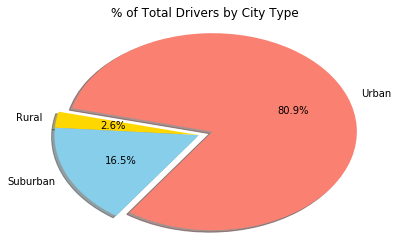

In [10]:
# Calculate Driver Percents
TotalDriversGrouped = Merge_data.groupby("city")["driver_count"].mean()
TotalDrivers = TotalDriversGrouped.sum()

UrbanDriversGrouped = Merge_data.loc[Merge_data["type"] == "Urban", :].groupby("city")["driver_count"].mean()
UrbanDrivers = UrbanDriversGrouped.sum()
RuralDriversGrouped = Merge_data.loc[Merge_data["type"] == "Rural", :].groupby("city")["driver_count"].mean()
RuralDrivers = RuralDriversGrouped.sum()
SubDriversGrouped = Merge_data.loc[Merge_data["type"] == "Suburban", :].groupby("city")["driver_count"].mean()
SubDrivers = SubDriversGrouped.sum()
percent_drivers = [UrbanDrivers/TotalDrivers,
                 RuralDrivers/TotalDrivers,
                 SubDrivers/TotalDrivers]
                                                                                       
                                                                                       
plt.pie(percent_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-125) 
plt.title("% of Total Drivers by City Type")
plt.axis("tight")

#Build Pie Charts
# Save Figure
plt.savefig('Pie_Chart_Pyber3.png')
